In [1]:
import geocoder
# g = geocoder.arcgis('San Francisco, CA')
from text_to_places import *
from map_places import *

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [2]:
def filterLocations(geojsons, locator):
    osm_allowed = ['place', 'boundary']
    arcgis_allowed = ['Locality']
    
    locations = {}
    for name,geojson in geojsons.items():        
        for f in geojson['features']:
            quality = f['properties']['quality']
            if locator == 'osm':
                geotype = f['properties']['raw']['type']
                category = f['properties']['raw']['category']
            else:
                geotype = category = None

            print(name, '(qual, cat, type) :',quality,category,geotype)
            if locator=='osm':
                if category in osm_allowed:
                    locations[name] = geojson
                    break
            elif locator=='arcgis':
                if quality in arcgis_allowed:
                    locations[name] = geojson
                    break
            else:
                raise Exception("Locator unknown:", locator)
            print("...filtered", name)
    return locations


OSM
Santa Fe (qual, cat, type) : city place city
Albuquerque (qual, cat, type) : city place city
Middle Earth (qual, cat, type) : hamlet place hamlet
filtered count: 3


C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


coords not found for Santa Fe
got coords for Albuquerque
coords not found for Middle Earth
2filtered 2count: 1
getDataFrame DEPRECATED, use makeDataFrame instead


ARCGIS
Santa Fe (qual, cat, type) : Locality None None
Albuquerque (qual, cat, type) : Locality None None
Middle Earth (qual, cat, type) : Locality None None
filtered count: 3
coords not found for Santa Fe
got coords for Albuquerque
coords not found for Middle Earth
2filtered 2count: 1
getDataFrame DEPRECATED, use makeDataFrame instead




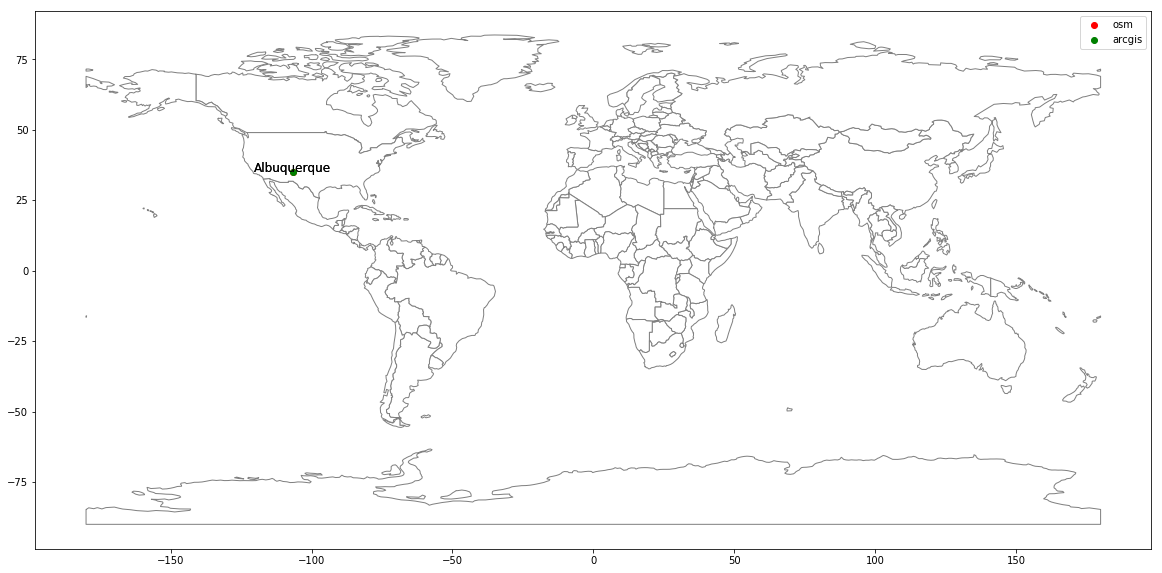

In [5]:
# define a list of locations to test, and a list of locators
text = '''
Santa Fe,
Albuquerque,
Middle Earth,
America
'''
import wikipedia
# text = wikipedia.page("Barack Obama").content
locators = [
    geocoder.osm, 
    geocoder.arcgis
]
import geopandas

# query each of those using each API we want to test
locs = getLocations(text)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='gray', figsize=(20,20))

colors = ['red', 'green']
for i,locator in enumerate(locators):
    print(locator.__name__.upper())
    geojsons = getGeojson(locs, locator)
    geojsons = filterLocations(geojsons, locator.__name__)
    print('filtered count:', len(geojsons))
    latLngs = geojsonToLatLng(geojsons)
    latLngs = wikipediaFilter(latLngs)
    print('2filtered 2count:', len(latLngs))
    gdf = getDataFrame(latLngs)
    mapCategory(gdf, ax, colors[i], locator.__name__)
    print('\n')

bbox = { 'xmax': -70, 'xmin': -125, 'ymax': 55, 'ymin': 30}
# plt.xlim(bbox['xmin'], bbox['xmax'])
# plt.ylim(bbox['ymin'], bbox['ymax'])
plt.legend()
plt.show()
# mapByCategory(gdf, True)
    
    
# plt.show()

In [4]:
geocoder.osm('La la la la la').geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'accuracy': 0.501,
    'address': 'Lae-Lae, JL . Dg. Tompo, Makassar ᨆᨀᨔᨑ, Galesong Selatan, Sulawesi Selatan, 90114, Indonesia',
    'bbox': [119.409892, -5.1433745, 119.4101384, -5.1431291],
    'city': 'Makassar ᨆᨀᨔᨑ',
    'confidence': 10,
    'country': 'Indonesia',
    'country_code': 'id',
    'county': 'Galesong Selatan',
    'icon': 'https://nominatim.openstreetmap.org/images/mapicons/food_restaurant.p.20.png',
    'importance': 0.501,
    'lat': -5.1432679,
    'lng': 119.410013597392,
    'ok': True,
    'osm_id': '195254112',
    'osm_type': 'way',
    'place_id': '120979295',
    'place_rank': '30',
    'postal': '90114',
    'quality': 'restaurant',
    'raw': {'place_id': '120979295',
     'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
     'osm_type': 'way',
     'osm_id': '195254112',
     'boundingbox': ['-5.1433745', '-5.1431291', '119.409892', '119